In [2]:
import requests

In [3]:
def get_stock_data(stock_symbol, start_date, end_date):
    base_url = f'https://api.tiingo.com/tiingo/daily/{stock_symbol}/prices?'
    token = '92549df1ba9e9e2d4d3c7c916a312b5f665a92a4'
    payload = {
        'startDate': start_date,
        'endDate': end_date,
        'token': token
    }
    response = requests.get(base_url, params=payload)
    return response

In [24]:
response = get_stock_data('AAPL', '2019-11-4', '2020-11-10')
print(response.url)
print(response.json())

https://api.tiingo.com/tiingo/daily/AAPL/prices?startDate=2019-11-4&endDate=2020-11-10&token=92549df1ba9e9e2d4d3c7c916a312b5f665a92a4
[{'date': '2019-11-04T00:00:00.000Z', 'close': 257.5, 'high': 257.85, 'low': 255.38, 'open': 257.33, 'volume': 25817952, 'adjClose': 63.6340711122, 'adjHigh': 63.7205640244, 'adjLow': 63.110171187, 'adjOpen': 63.5920602692, 'adjVolume': 103271808, 'divCash': 0.0, 'splitFactor': 1.0}, {'date': '2019-11-05T00:00:00.000Z', 'close': 257.13, 'high': 258.19, 'low': 256.32, 'open': 257.05, 'volume': 19974427, 'adjClose': 63.5426357479, 'adjHigh': 63.8045857106, 'adjLow': 63.3424664368, 'adjOpen': 63.5228659394, 'adjVolume': 79897708, 'divCash': 0.0, 'splitFactor': 1.0}, {'date': '2019-11-06T00:00:00.000Z', 'close': 257.24, 'high': 257.49, 'low': 255.37, 'open': 256.77, 'volume': 18966124, 'adjClose': 63.5698192346, 'adjHigh': 63.6315998862, 'adjLow': 63.1076999609, 'adjOpen': 63.4536716097, 'adjVolume': 75864496, 'divCash': 0.0, 'splitFactor': 1.0}, {'date': '2

In [25]:
def parse_data(data_response):
    json_data = data_response.json()
    dates = []
    closes =[]
    opens = []
    highs = []
    lows = []
    vols = []
    for json_object in json_data:
        dates.append(json_object['date'])
        closes.append(json_object['close'])
        opens.append(json_object['open'])
        highs.append(json_object['high'])
        lows.append(json_object['low'])
        vols.append(json_object['volume'])
    return dates, closes, opens, highs, lows, vols

In [26]:
dates, closes, opens, highs, lows, vols = parse_data(response)
print(dates)


['2019-11-04T00:00:00.000Z', '2019-11-05T00:00:00.000Z', '2019-11-06T00:00:00.000Z', '2019-11-07T00:00:00.000Z', '2019-11-08T00:00:00.000Z', '2019-11-11T00:00:00.000Z', '2019-11-12T00:00:00.000Z', '2019-11-13T00:00:00.000Z', '2019-11-14T00:00:00.000Z', '2019-11-15T00:00:00.000Z', '2019-11-18T00:00:00.000Z', '2019-11-19T00:00:00.000Z', '2019-11-20T00:00:00.000Z', '2019-11-21T00:00:00.000Z', '2019-11-22T00:00:00.000Z', '2019-11-25T00:00:00.000Z', '2019-11-26T00:00:00.000Z', '2019-11-27T00:00:00.000Z', '2019-11-29T00:00:00.000Z', '2019-12-02T00:00:00.000Z', '2019-12-03T00:00:00.000Z', '2019-12-04T00:00:00.000Z', '2019-12-05T00:00:00.000Z', '2019-12-06T00:00:00.000Z', '2019-12-09T00:00:00.000Z', '2019-12-10T00:00:00.000Z', '2019-12-11T00:00:00.000Z', '2019-12-12T00:00:00.000Z', '2019-12-13T00:00:00.000Z', '2019-12-16T00:00:00.000Z', '2019-12-17T00:00:00.000Z', '2019-12-18T00:00:00.000Z', '2019-12-19T00:00:00.000Z', '2019-12-20T00:00:00.000Z', '2019-12-23T00:00:00.000Z', '2019-12-24T00:00:0

In [27]:
def calculate_price_difference(opens, closes):
    price_differences = []
    for i in range(len(opens) - 1):
        if opens[i + 1] >= closes[i]:
            price_differences.append([1, 0])
        else:
            price_differences.append([0, 1])
    return price_differences

In [28]:
price_differences = calculate_price_difference(opens, closes)
differences = []
for difference in price_differences:
    differences.append(difference[0])

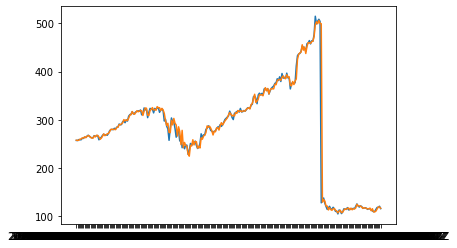

In [29]:
import matplotlib.pyplot as plt

plt.plot(dates[1:], opens[1:])
plt.plot(dates[1:], closes[:-1])
plt.show()

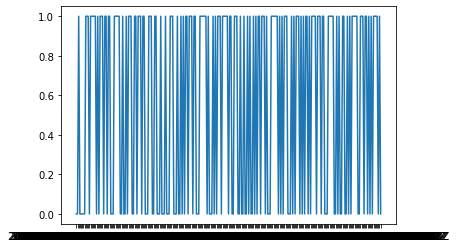

In [30]:
plt.plot(dates[1:], differences)
plt.show()

In [89]:
def create_datasets(stock_symbol, start_date, end_date):
    response = get_stock_data(stock_symbol, start_date, end_date)
    dates, closes, opens, highs, lows, vols = parse_data(response)
    
    labels = calculate_price_difference(opens, closes)
    
    inputs = []
    for i in range(len(labels)):
        inputs.append([closes[i], opens[i], highs[i], lows[i], vols[i]/1000])
    
    return inputs, labels

In [119]:
x_train, y_train = create_datasets('AAPL', '2019-1-1', '2020-10-1')
x_test, y_test = create_datasets('AAPL', '2020-10-1', '2020-11-2')

In [120]:
# y = Wx + b
#import tensorflow as tf
import tensorflow.compat.v1 as tf

tf.disable_v2_behavior()

In [121]:
x_input = tf.placeholder(dtype=tf.float32, shape=[None, 5])
y_input = tf.placeholder(dtype=tf.float32, shape=[None, 2])
W = tf.Variable(initial_value=tf.ones(shape=[5, 2]))
b = tf.Variable(initial_value=tf.ones(shape=[2]))
y_output = tf.add(tf.matmul(x_input, W), b)

In [122]:
loss = tf.reduce_sum(tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits_v2(
        labels=y_input, logits=y_output)))
optimizer = tf.train.GradientDescentOptimizer(0.01)
train_step = optimizer.minimize(loss)

In [123]:
def measure_accuracy(actual, expected):
    num_correct = 0
    for i in range(len(actual)):
        actual_value = actual[i]
        expected_value = expected[i]
        if actual_value[0] >= actual_value[1] and expected_value[0] >= expected_value[1]:
            num_correct += 1
        elif actual_value[0] <= actual_value[1] and expected_value[0] <= expected_value[1]:
            num_correct += 1
    return (num_correct / len(actual)) * 100

In [124]:
session = tf.Session()
session.run(tf.global_variables_initializer())

In [125]:
for _ in range(2000):
    session.run(train_step, feed_dict={x_input: x_train, y_input: y_train}) #train: modify w b
print(measure_accuracy(session.run(
    y_output, feed_dict={x_input: x_test}), y_test))

63.63636363636363


In [126]:
print(session.run(
    y_output, feed_dict={x_input: x_test}), y_test)

[[ 11859571.  -11626392. ]
 [ 14774390.  -14484057. ]
 [ 10852186.  -10638775. ]
 [ 16486185.  -16162272. ]
 [  9894163.   -9699544. ]
 [  8530785.   -8362904.5]
 [ 10267345.  -10065401. ]
 [ 24515234.  -24033802. ]
 [ 26769176.  -26243530. ]
 [ 15423193.  -15120097. ]
 [ 11496889.  -11270811. ]
 [ 11785993.  -11554243. ]
 [ 12320512.  -12078288. ]
 [ 12706255.  -12456469. ]
 [  9190662.   -9009830. ]
 [ 10418430.  -10213521. ]
 [  8438557.   -8272485. ]
 [ 11423810.  -11199190. ]
 [  9428133.   -9242649. ]
 [ 14695415.  -14406632. ]
 [ 14919037.  -14625863. ]
 [ 19450198.  -19068168. ]] [[0, 1], [1, 0], [0, 1], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [0, 1], [0, 1], [1, 0], [1, 0], [1, 0], [0, 1], [1, 0], [1, 0], [0, 1], [1, 0], [0, 1], [1, 0], [0, 1], [1, 0]]


<ipython-input-140-5e67c4c4f541>:2: MatplotlibDeprecationWarning: cycling among columns of inputs with non-matching shapes is deprecated.
  plt.plot(x_train, model_output)


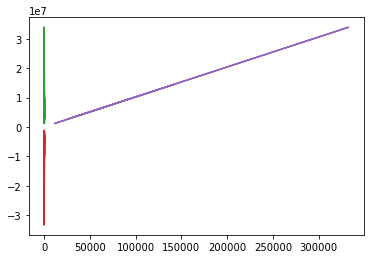

In [140]:
model_output = session.run(y_output, feed_dict={x_input: x_train})
plt.plot(x_train, model_output)

plt.show()